In [12]:
import os
import cv2
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd
import numpy as np
import json

In [13]:
# collect all performances

def get_loocv(model_folder):
    columns = ["thresh", "acc", "balance_acc", "weight_f1", "avg_f1", "model", "cv_type", "testset"]
    
    loocv_performances = []
    glob_path = f"./{model_folder}/map_out/loocv/*/performance.json"
    for json_file in glob(glob_path):
        image_id = json_file.split("/")[-2]
        with open(json_file) as f:
            res_json = json.load(f)
        for k, subd in res_json.items():
            record = [float(k), subd["accuracy"], subd["balanced_accuracy"], subd["weighted_f1"], subd["avg_f1"]]
            # model, cv_type, testset
            record += [model_folder, "loocv", image_id]
            loocv_performances.append(record)        
    loocv_performances = pd.DataFrame(loocv_performances, columns=columns)

    loocv_overall = pd.read_table(f"./{model_folder}/map_out/loocv/avg_scores.tsv", sep="\t", header=None,
                                  names=["thresh", "acc", "balance_acc", "weight_f1", "avg_f1"])
    loocv_overall["model"] = model_folder
    loocv_overall["cv_type"] = "loocv"
    loocv_overall["testset"] = "average"

    return pd.concat([loocv_performances, loocv_overall], ignore_index=True)


def get_cross_resolution(model_folder):
    cross_reso_performances = pd.read_table(f"./{model_folder}/map_out/for_expression/performance.tsv", sep="\t", header=None,
                                            names=["thresh", "acc", "balance_acc", "weight_f1", "avg_f1"])
    cross_reso_performances["model"] = model_folder
    cross_reso_performances["cv_type"] = "cross-resolution"
    cross_reso_performances["testset"] = "low-resolution"
    return cross_reso_performances

all_performances = pd.concat([
    get_loocv("Faster-RCNN"),
    get_loocv("Faster-RCNN-Ensemble"),
    get_loocv("Faster-RCNN-Ensemble-Xinya"),
    get_loocv("Faster-RCNN-Kaiwen2Xinya"),
    get_loocv("Faster-RCNN-Xinya2Kaiwen"),
    get_cross_resolution("Faster-RCNN"),
    get_cross_resolution("Faster-RCNN-Ensemble"),
    get_cross_resolution("Faster-RCNN-Ensemble-Xinya"),
    get_cross_resolution("Faster-RCNN-Kaiwen2Xinya"),
    get_cross_resolution("Faster-RCNN-Xinya2Kaiwen"),
], ignore_index=True)

all_performances.to_csv("./Figure2/all_performances_wsingle.csv", index=False)

In [14]:
# collect all results

def get_predictions(model_folder):
    all_preds = pd.DataFrame()

    glob_path = f"./{model_folder}/map_out/loocv/*/results.csv"
    for res_file in glob(glob_path):
        pred_results = pd.read_csv(res_file)
        pred_results["model"] = model_folder
        pred_results["cv_type"] = "loocv"
        all_preds = pd.concat([all_preds, pred_results], ignore_index=True)

    pred_results = pd.read_csv(f"./{model_folder}/map_out/for_expression/results.csv")
    pred_results["model"] = model_folder
    pred_results["cv_type"] = "cross-resolution"
    all_preds = pd.concat([all_preds, pred_results], ignore_index=True)
    return all_preds
    
all_predictions = pd.concat([
    get_predictions("Faster-RCNN"),
    get_predictions("Faster-RCNN-Ensemble"),
    get_predictions("Faster-RCNN-Ensemble-Xinya"),
    get_predictions("Faster-RCNN-Kaiwen2Xinya"),
    get_predictions("Faster-RCNN-Xinya2Kaiwen"),
], ignore_index=True)

all_predictions.to_csv("./Figure2/all_predictions_wsingle.csv", index=False)

In [5]:
all_predictions

,image_id,cell_num,class,difficult,image_set,preds_class,model,cv_type
0,Image10_25_15,1,Singlet,False,Image10,Singlet,Faster-RCNN-Ensemble,loocv
1,Image10_9_18,1,Singlet,False,Image10,Singlet,Faster-RCNN-Ensemble,loocv
2,Image10_4_3,1,Singlet,False,Image10,Singlet,Faster-RCNN-Ensemble,loocv
3,Image10_32_12,1,Singlet,False,Image10,Singlet,Faster-RCNN-Ensemble,loocv
4,Image10_23_4,0,Missing,False,Image10,Singlet,Faster-RCNN-Ensemble,loocv
...,...,...,...,...,...,...,...,...
30377,Image5_11_10,1,Singlet,False,Image5,Singlet,Faster-RCNN-Xinya2Kaiwen,cross-resolution
30378,Image5_24_20,0,Missing,False,Image5,Missing,Faster-RCNN-Xinya2Kaiwen,cross-resolution
30379,Image5_39_11,0,Missing,False,Image5,Missing,Faster-RCNN-Xinya2Kaiwen,cross-resolution
30380,Image5_7_8,1,Singlet,False,Image5,Singlet,Faster-RCNN-Xinya2Kaiwen,cross-resolution


In [13]:
all_predictions[
    (all_predictions.cv_type == "loocv") &
    (all_predictions.model == "Faster-RCNN-Ensemble")
]

,image_id,cell_num,class,difficult,image_set,preds_class,model,cv_type
0,Image10_25_15,1,Singlet,False,Image10,Singlet,Faster-RCNN-Ensemble,loocv
1,Image10_9_18,1,Singlet,False,Image10,Singlet,Faster-RCNN-Ensemble,loocv
2,Image10_4_3,1,Singlet,False,Image10,Singlet,Faster-RCNN-Ensemble,loocv
3,Image10_32_12,1,Singlet,False,Image10,Singlet,Faster-RCNN-Ensemble,loocv
4,Image10_23_4,0,Missing,False,Image10,Singlet,Faster-RCNN-Ensemble,loocv
...,...,...,...,...,...,...,...,...
5515,Image5_11_10,1,Singlet,False,Image5,Singlet,Faster-RCNN-Ensemble,loocv
5516,Image5_24_20,0,Missing,False,Image5,Missing,Faster-RCNN-Ensemble,loocv
5517,Image5_39_11,0,Missing,False,Image5,Missing,Faster-RCNN-Ensemble,loocv
5518,Image5_7_8,1,Singlet,False,Image5,Singlet,Faster-RCNN-Ensemble,loocv


In [15]:
12275-2916

9359

In [5]:
# check the performance results
results = pd.read_csv("./Faster-RCNN-Kaiwen2Xinya/map_out/for_expression/results.csv")

In [6]:
results[(results["class"] == "Doublet") & (results["image_set"] == "Image11")].preds_class.value_counts()

Doublet    128
Singlet      6
Name: preds_class, dtype: int64

In [7]:
# try to find the mislabeled images

In [14]:
def plot_image_bbox(image_file, xml_file=None, pred_file=None, save_img="output.png"):

    bboxes = []
    if xml_file is not None:
        tree=ET.parse(xml_file)
        root = tree.getroot()

        for obj in root.iter('object'):
            xmlbox = obj.find('bndbox')
            b = (int(float(xmlbox.find('xmin').text)), int(float(xmlbox.find('ymin').text)), int(float(xmlbox.find('xmax').text)), int(float(xmlbox.find('ymax').text)))
            bboxes.append(b)
    elif pred_file is not None:
        with open(pred_file, "r") as f:
            lines = f.readlines()
            for line in lines:
                line = line.strip().split()
                if float(line[1]) >= 0.7:
                    b = (int(float(line[2])), int(float(line[3])), int(float(line[4])), int(float(line[5])))
                    bboxes.append(b)
    elif pred_file is not None and xml_file is not None:
        raise ValueError("Only one of xml_file and pred_file can be provided")
    elif pred_file is None and xml_file is None:
        raise ValueError("One of xml_file and pred_file must be provided")

    image = cv2.imread(image_file)
    print(image.shape)
    for box in bboxes:
        xmin, ymin, xmax, ymax = box
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 1)

    plt.imshow(image)
    cv2.imwrite(save_img, image)

In [8]:
preds_1 = get_predictions("Faster-RCNN-Ensemble")
preds_2 = get_predictions("Faster-RCNN-Ensemble-Xinya")
preds = pd.merge(preds_1, preds_2, how="inner", on="image_id", suffixes=["_1", "_2"])

In [48]:
labeler_dir = "/local/disk2/xinyaxu/single_cell_image/"
labeler_dir = "./"

(101, 101, 3)


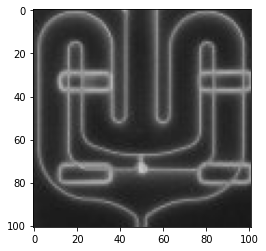

In [65]:
plot_image_bbox(
    # os.path.join(labeler_dir, "crop_image/Image3/Image3_16_5.png"),
    "crop_image/Image11/Image11_25_14.png",
    # xml_file=os.path.join(labeler_dir, "crop_label/Image3/Image3_16_5.xml"),
    xml_file="./crop_labels/Image11/Image11_25_14.xml",
    save_img="hand_missing_pred_singlet_hand_lowreso.png"
)

(101, 101, 3)


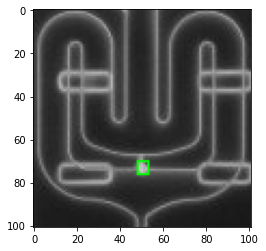

In [66]:
plot_image_bbox(
    "crop_image/Image11/Image11_25_14.png",
    pred_file="./Faster-RCNN-Ensemble/img_out/loocv/Image11/detection-results-model1/Image11_25_14.txt",
    save_img="hand_missing_pred_singlet_pred_lowreso.png"
)

In [57]:
preds[(preds.image_id.str.startswith("Image11")) & (preds.cv_type_1 != "loocv") & (preds["class_1"] != preds["class_2"])]

,image_id,cell_num_1,class_1,difficult_1,image_set_1,preds_class_1,model_1,cv_type_1,cell_num_2,class_2,difficult_2,image_set_2,preds_class_2,model_2,cv_type_2
3619,Image11_32_8,1,Singlet,False,Image11,Singlet,Faster-RCNN-Ensemble,cross-resolution,2,Doublet,False,Image11,Doublet,Faster-RCNN-Ensemble-Xinya,loocv
3620,Image11_32_8,1,Singlet,False,Image11,Singlet,Faster-RCNN-Ensemble,cross-resolution,2,Doublet,False,Image11,Singlet,Faster-RCNN-Ensemble-Xinya,cross-resolution
3667,Image11_29_14,0,Missing,False,Image11,Missing,Faster-RCNN-Ensemble,cross-resolution,1,Singlet,False,Image11,Missing,Faster-RCNN-Ensemble-Xinya,loocv
3668,Image11_29_14,0,Missing,False,Image11,Missing,Faster-RCNN-Ensemble,cross-resolution,1,Singlet,False,Image11,Missing,Faster-RCNN-Ensemble-Xinya,cross-resolution
3795,Image11_12_19,0,Missing,False,Image11,Singlet,Faster-RCNN-Ensemble,cross-resolution,1,Singlet,False,Image11,Singlet,Faster-RCNN-Ensemble-Xinya,loocv
3796,Image11_12_19,0,Missing,False,Image11,Singlet,Faster-RCNN-Ensemble,cross-resolution,1,Singlet,False,Image11,Doublet,Faster-RCNN-Ensemble-Xinya,cross-resolution
4031,Image11_6_6,1,Singlet,False,Image11,Doublet,Faster-RCNN-Ensemble,cross-resolution,2,Doublet,False,Image11,Doublet,Faster-RCNN-Ensemble-Xinya,loocv
4032,Image11_6_6,1,Singlet,False,Image11,Doublet,Faster-RCNN-Ensemble,cross-resolution,2,Doublet,False,Image11,Doublet,Faster-RCNN-Ensemble-Xinya,cross-resolution
4291,Image11_27_16,0,Missing,False,Image11,Missing,Faster-RCNN-Ensemble,cross-resolution,1,Singlet,False,Image11,Singlet,Faster-RCNN-Ensemble-Xinya,loocv
4292,Image11_27_16,0,Missing,False,Image11,Missing,Faster-RCNN-Ensemble,cross-resolution,1,Singlet,False,Image11,Missing,Faster-RCNN-Ensemble-Xinya,cross-resolution
